In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

**Data Loading**

In [36]:
data = pd.read_csv('/content/Electric_Production.csv')

In [37]:
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [39]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [40]:
data.set_index('DATE', inplace=True)

In [41]:
data.shape

(397, 1)

**Plotting the time series**

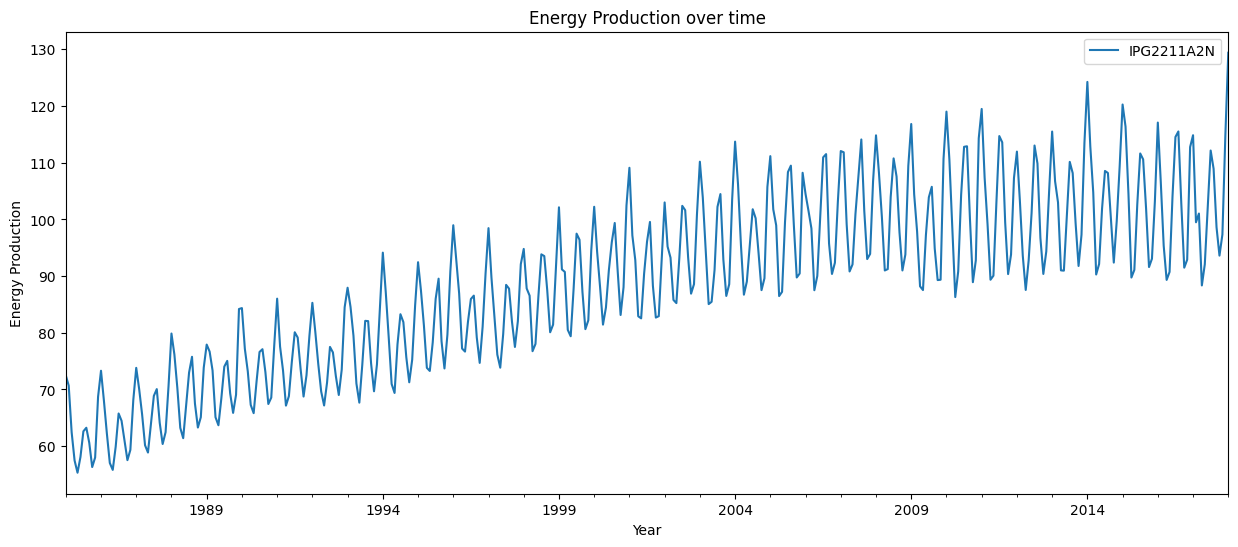

In [42]:
data.plot(figsize=(15,6))
plt.title("Energy Production over time")
plt.xlabel("Year")
plt.ylabel("Energy Production")
plt.show()

**Decomposition**

**Additive Decomposition**

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

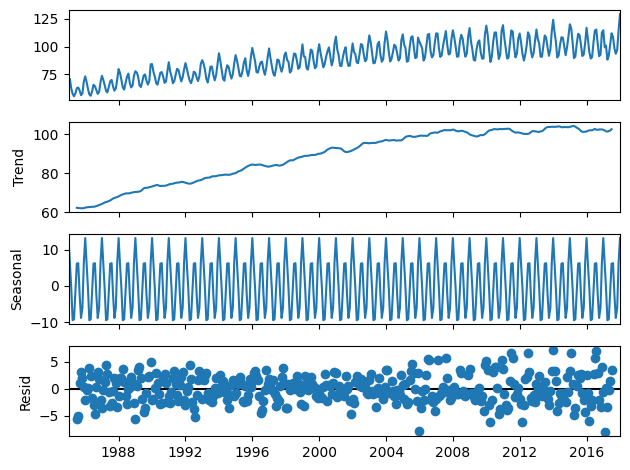

In [44]:
add_dec = seasonal_decompose(data, model='additive')
add_dec.plot()
plt.show()

https://www.kaggle.com/c/web-traffic-time-series-forecasting

**Multiplicative decomposition**

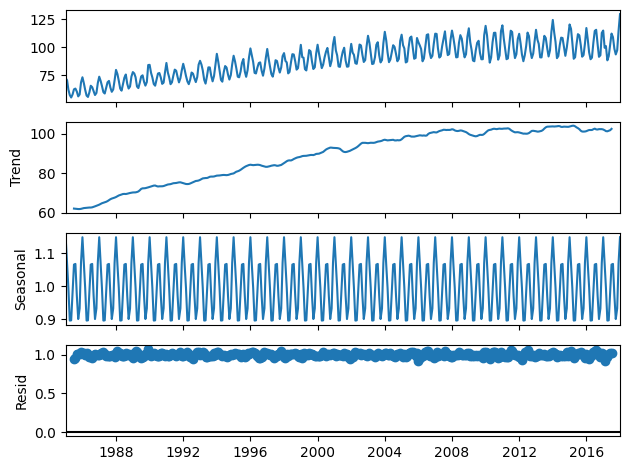

In [45]:
mult_decomp = seasonal_decompose(data, model='multiplicative')
mult_decomp.plot()
plt.show()

**Stationarity**

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
adf_results = adfuller(data)

In [48]:
adf_results

(-2.256990350047235,
 0.1862146911658712,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [49]:
print(f'ADF Statistic: {adf_results[0]}')
print(f'p-value: {adf_results[1]}')
print(f'Critical Values: {adf_results[4]}')

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


**Differencing**

**Null hypothesis : The time series is NOT stationary**

In [50]:
data_diff = data.diff().dropna()

In [51]:
adf_results_diff = adfuller(data_diff)
print(f'ADF Statistic: {adf_results_diff[0]}')
print(f'p-value: {adf_results_diff[1]}')
print(f'Critical Values: {adf_results_diff[4]}')

ADF Statistic: -7.104890882267311
p-value: 4.0777865655394095e-10
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


ARIMA - I (differencing term)

**ACF and PACF Plots**

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

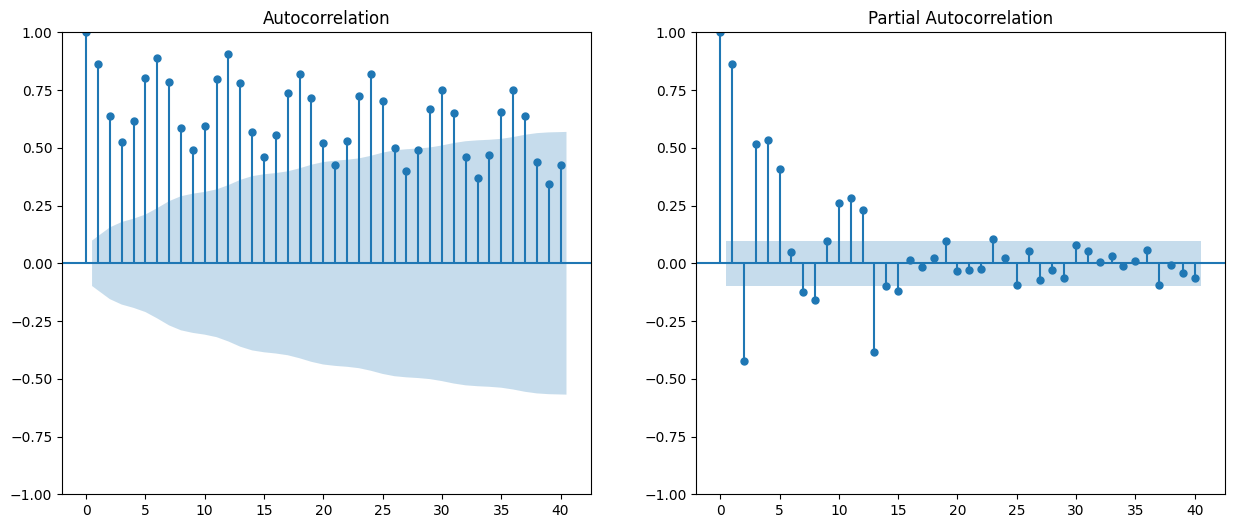

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot_acf(data,ax=plt.gca(),lags=40)
plt.subplot(1,2,2)
plot_pacf(data,ax=plt.gca(),lags=40)
plt.show()

AR - 5,
MA -
s - 6

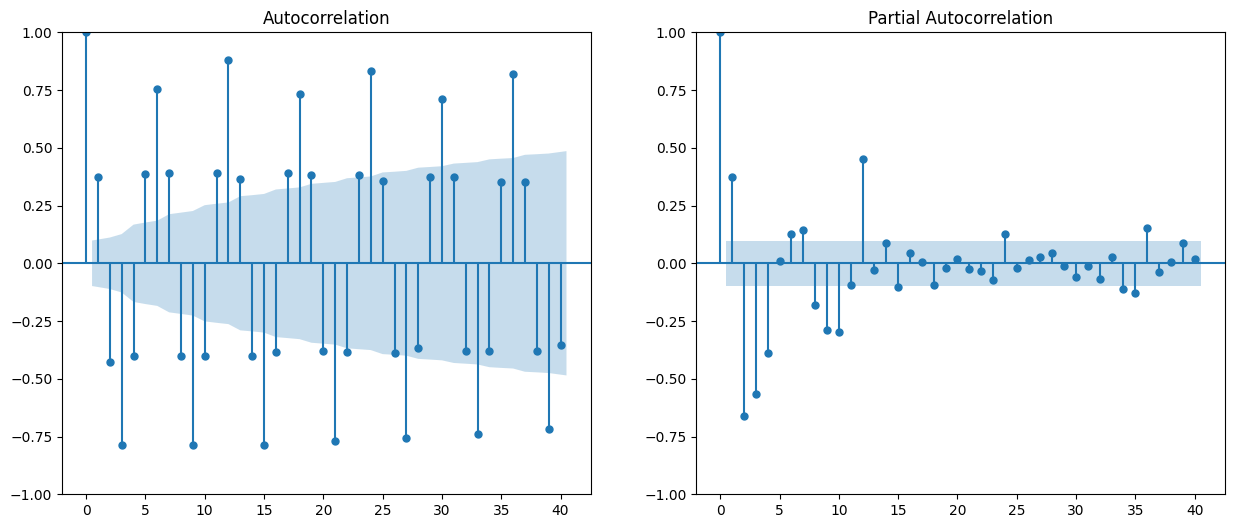

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot_acf(data_diff,ax=plt.gca(),lags=40)
plt.subplot(1,2,2)
plot_pacf(data_diff,ax=plt.gca(),lags=40)
plt.show()

**Modelling**

In [55]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
# splitting the data

size = int(len(data)*0.8)
train = data[:size]
test = data[size:]

In [58]:
train.shape

(317, 1)

In [59]:
test.shape

(80, 1)

ar(5),ma(4),d(1)

In [60]:
model = ARIMA(train,order=(5,1,4))
model_fit = model.fit()

In [61]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  317
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -804.847
Date:                Thu, 22 Aug 2024   AIC                           1629.695
Time:                        09:33:12   BIC                           1667.252
Sample:                    01-01-1985   HQIC                          1644.699
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5339      0.080      6.661      0.000       0.377       0.691
ar.L2         -0.1364      0.061     -2.220      0.026      -0.257      -0.016
ar.L3         -0.9794      0.044    -22.505      0.000      -1.065      -0.894
ar.L4          0.5151      0.077      6.658      0.000       0.363       0.667
ar.L5         -0.1170      0.064     -1.820      0.069      -0.243       0.009
ma.L1         -0.7989      0.071    -11.175      0.000      -0.939      -0.659
ma.L2          0.0174      0.080      0.217      0.828      -0.140       0.175
ma.L3          0.9282      0.045     20.586      0.000       0.840       1.017
ma.L4         -0.8548      0.071    -11.980      0.000      -0.995      -0.715
sigma2         8.5289      0.744     11.457      0.000       7.070       9.988
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                18.97
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start = len(train)
end = len(train)+len(test)-1
predictions = model_fit.predict(start=start, end=end, typ='levels')

In [64]:
test.head()

,IPG2211A2N
DATE,
2011-06-01,102.8204
2011-07-01,114.7068
2011-08-01,113.5958
2011-09-01,99.4712
2011-10-01,90.3566


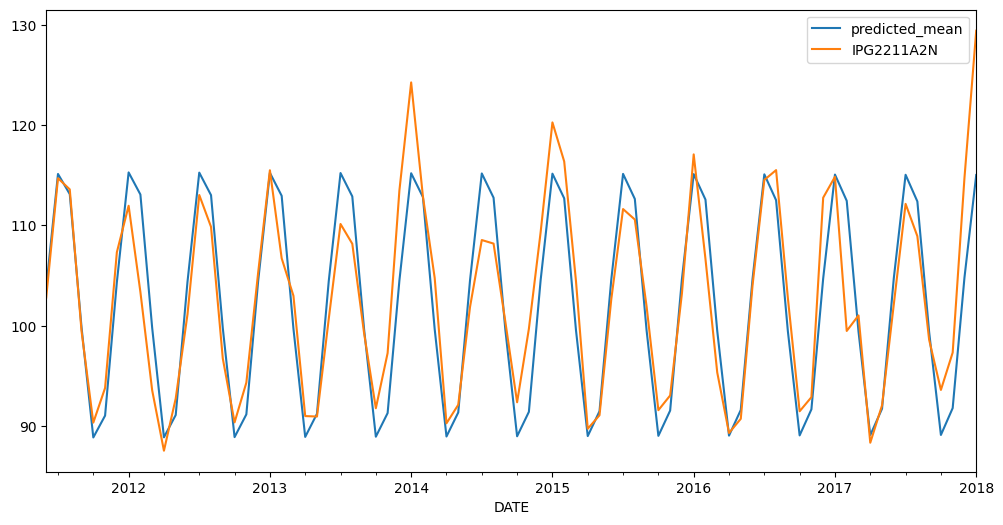

In [66]:
plt.figure(figsize=(12,6))
predictions.plot(legend=True)
test['IPG2211A2N'].plot(legend=True)
plt.show()

**Evaluate my model**

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(test,predictions)

19.35435840293801

**Auto Arima**

In [69]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.9 MB/s eta 0:00:00


In [70]:
from pmdarima.arima import auto_arima

In [71]:
auto_arima(data,trace=True,suppress_warnings=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=1.61 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.53 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.82 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Thu, 22 Aug 2024   AIC                           2058.739
Time:                        09:40:41   BIC                           2090.591
Sample:                    01-01-1985   HQIC                          2071.358
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1107      0.024      4.709      0.000       0.065       0.157
ar.L1          0.9985      0.002    510.517      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -761.858      0.000      -1.002      -0.997
ma.L1         -1.3637      0.038    -35.740      0.000      -1.438      -1.289
ma.L2          0.9222      0.071     12.944      0.000       0.783       1.062
ma.L3          0.0080      0.071      0.111      0.911      -0.132       0.148
ma.L4         -0.4337      0.042    -10.278      0.000      -0.516      -0.351
sigma2         9.8732      0.632     15.614      0.000       8.634      11.113
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                21.99
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
auto_arima(data,trace=True,suppress_warnings=True,seasonal=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.80 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=2.75 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Thu, 22 Aug 2024   AIC                           2058.739
Time:                        09:42:08   BIC                           2090.591
Sample:                    01-01-1985   HQIC                          2071.358
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1107      0.024      4.709      0.000       0.065       0.157
ar.L1          0.9985      0.002    510.517      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -761.858      0.000      -1.002      -0.997
ma.L1         -1.3637      0.038    -35.740      0.000      -1.438      -1.289
ma.L2          0.9222      0.071     12.944      0.000       0.783       1.062
ma.L3          0.0080      0.071      0.111      0.911      -0.132       0.148
ma.L4         -0.4337      0.042    -10.278      0.000      -0.516      -0.351
sigma2         9.8732      0.632     15.614      0.000       8.634      11.113
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                21.99
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
model_auto = ARIMA(train,order=(2,1,4))
model_auto_fit = model_auto.fit()

In [77]:
start = len(train)
end = len(train)+len(test)-1
predictions = model_auto_fit.predict(start=start, end=end, typ='levels')

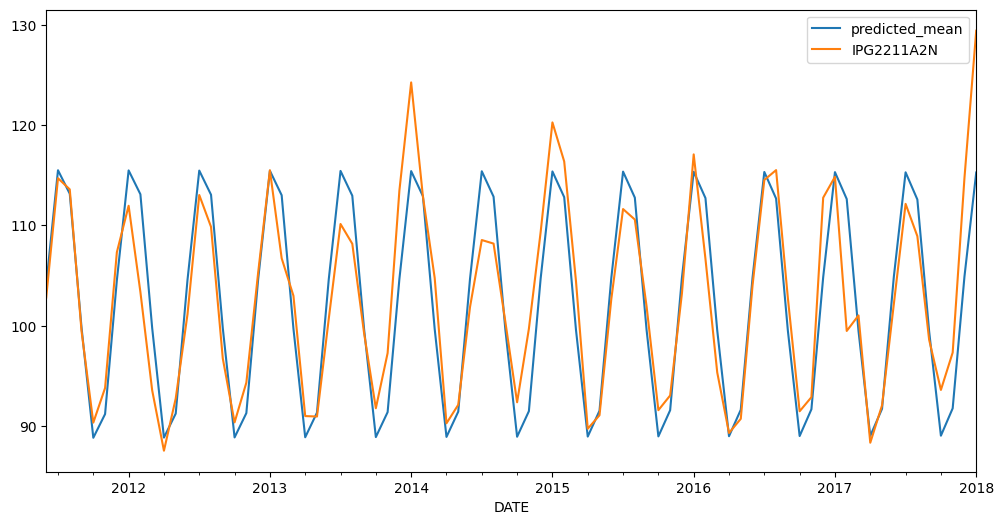

In [78]:
plt.figure(figsize=(12,6))
predictions.plot(legend=True)
test['IPG2211A2N'].plot(legend=True)
plt.show()

In [79]:
mean_squared_error(test,predictions)

19.357851565721337

**Prophet Model Implementation**

In [80]:
from prophet import Prophet

In [81]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [82]:
data.reset_index(inplace=True)

In [83]:
data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [84]:
data.columns = ['ds','y']

In [85]:
data.head(2)

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720


In [86]:
ratio = 0.8
train_size = int(len(data)*ratio)
train = data[:train_size]
test = data[train_size:]

In [87]:
train.shape

(317, 2)

In [88]:
test.shape

(80, 2)

In [90]:
# instantiate our model

model = Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp65scqrp/js6yx_as.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp65scqrp/f032evrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34400', 'data', 'file=/tmp/tmpp65scqrp/js6yx_as.json', 'init=/tmp/tmpp65scqrp/f032evrk.json', 'output', 'file=/tmp/tmpp65scqrp/prophet_modelgjan38w2/prophet_model-20240822103844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:
test.head()

,ds,y
317,2011-06-01,102.8204
318,2011-07-01,114.7068
319,2011-08-01,113.5958
320,2011-09-01,99.4712
321,2011-10-01,90.3566


In [92]:
test_dates = test[['ds']].copy()

In [93]:
test_pred = model.predict(test_dates)

In [96]:
test['yhat'] = test_pred['yhat'].values

In [97]:
test.head()

,ds,y,yhat
317,2011-06-01,102.8204,100.486276
318,2011-07-01,114.7068,108.021600
319,2011-08-01,113.5958,109.073005
320,2011-09-01,99.4712,99.958420
321,2011-10-01,90.3566,93.973703


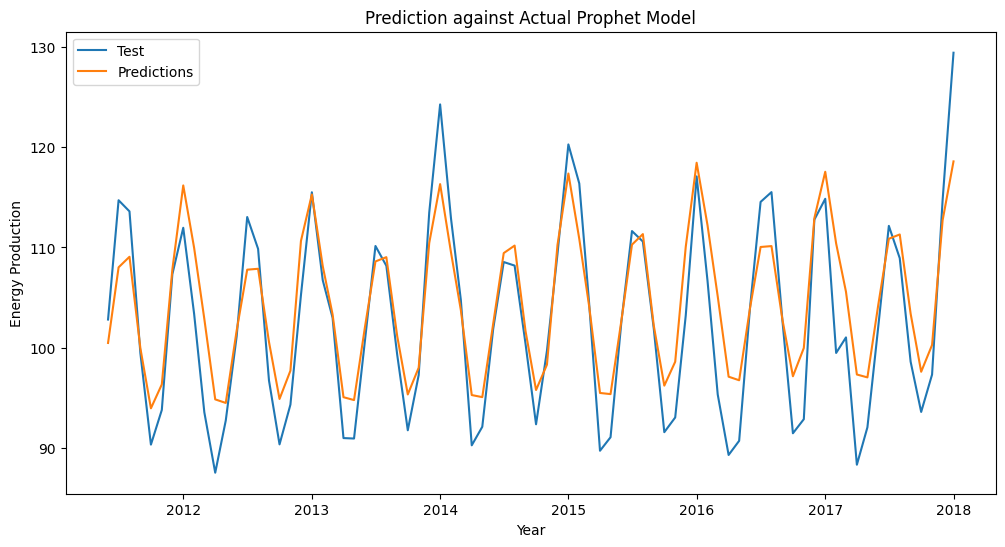

In [100]:
# plotting the predictions and test

plt.figure(figsize=(12,6))
plt.plot(test['ds'],test['y'],label='Test')
plt.plot(test['ds'],test['yhat'],label='Predictions')
plt.legend()
plt.title("Prediction against Actual Prophet Model")
plt.xlabel("Year")
plt.ylabel("Energy Production")
plt.show()

**Model Evaluation of the Prophet Model**

In [101]:
mean_squared_error(test['y'],test['yhat'])

19.741306633057384

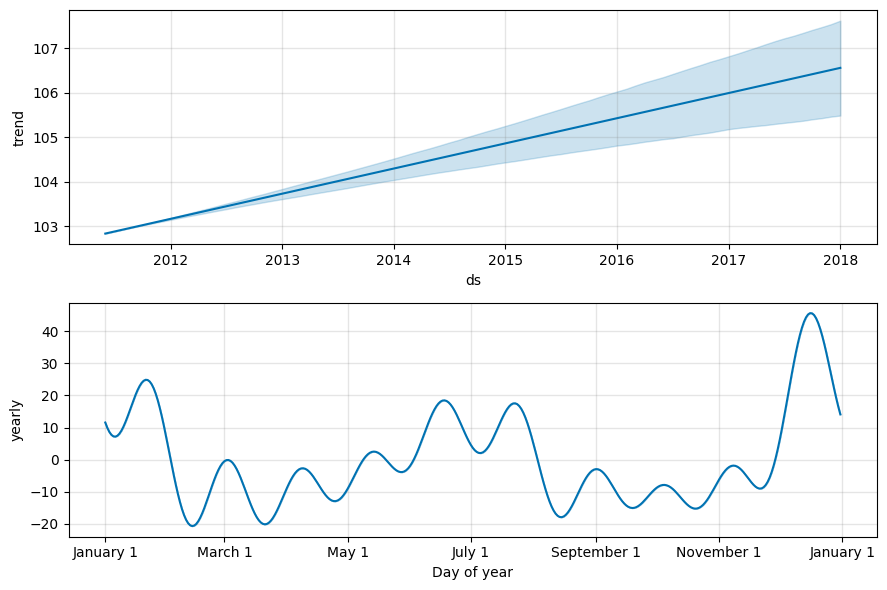

In [102]:
model.plot_components(test_pred)
plt.show()

**Make Future Predictions**

In [103]:
future = model.make_future_dataframe(periods=20)
forecast = model.predict(future)

<Axes: >

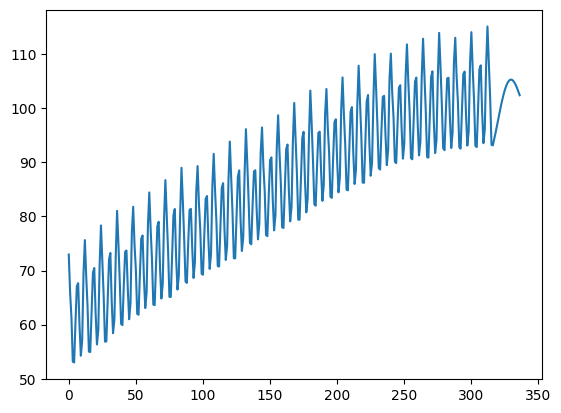

In [105]:
forecast['yhat'].plot()